## Exercise 6.1 — Thermal Wind Balance

In [ ]:
import numpy as np

# Defining constants
R = 287  # Specific gas constant for dry air in J/(kg·K)
g = 9.81  # Acceleration due to gravity in m/s^2
T0 = 288  # Standard temperature at sea level in K'
ps = 1013 # Standard pressure at sea level in hPa
z = 12000 # Height in m
dTs = - 15 # Surface Temperature change in K
dLat = 20 # Change in latitude in degrees
dy = 111e3 * dLat  # Approximate distance in m for change in latitude

H = R * T0 / g  # Scale height in meters
print(f"Scale height H = {H:.2f} meters")

pa = ps * np.exp(-z / H)  # Pressure at height z in hPa
print(f"Pressure at height {z:.0f} m = {pa:.2f} hPa")

# Calculate Coriolis parameter at 30° N
omega = 7.2921e-5  # Earth's angular velocity in rad/s
phi = np.deg2rad(30)  # Latitude in radians

f_coriolis = 2 * omega * np.sin(phi)
print(f"Coriolis parameter at 30°N: f = {f_coriolis:.3e} s^-1")

du = - (R * dTs) / (H * dy * f_coriolis) * z # Change in wind speed
print(f"Change in wind speed between surface and 12 km height du = {du:.2f} m/s")


Scale height H = 8425.69 meters
Pressure at height 12000 m = 243.83 hPa
Coriolis parameter at 30°N: f = 7.292e-05 s^-1
Change in wind speed between surface and 12 km height du = -37.87 m/s


The change in the wind speed is about 

## Exercise 6.2 — Streamlines

### Given:
The two-dimensional velocity field:

$$
\vec{u} = 2y\, \hat{i} - 2x\, \hat{j}
$$


### a) What condition must be met for a stream function to exist?

A stream function exists for a two-dimensional incompressible flow if the [continuity equation](https://www.ingenieurkurse.de/stroemungslehre/ebene-stroemungen/stromfunktion/beispiel-stromfunktion.html) is satisfied:

$$
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0
$$

**Check for this velocity field:**

$$
\frac{\partial (2y)}{\partial x} + \frac{\partial (-2x)}{\partial y} = 0 + 0 = 0
$$

The continuity equation is satisfied → a stream function exists.

### b) Determine the stream function

For a 2D flow:

$$
u = \frac{\partial \psi}{\partial y}, \quad v = -\frac{\partial \psi}{\partial x}
$$

Given:

$$
u = 2y, \quad v = -2x
$$

**Integrate each component:**

From $ u = \frac{\partial \psi}{\partial y} $:

$$
\psi(x, y) = \int 2y\, dy = y^2 + f(x)
$$

From $ v = -\frac{\partial \psi}{\partial x} $:

$$
\frac{\partial \psi}{\partial x} = 2x
$$

$$
\psi(x, y) = \int 2x\, dx = x^2 + g(y)
$$

**Combine both:**

$$
\psi(x, y) = x^2 + y^2 + C
$$

Where $C$ is an arbitrary constant.

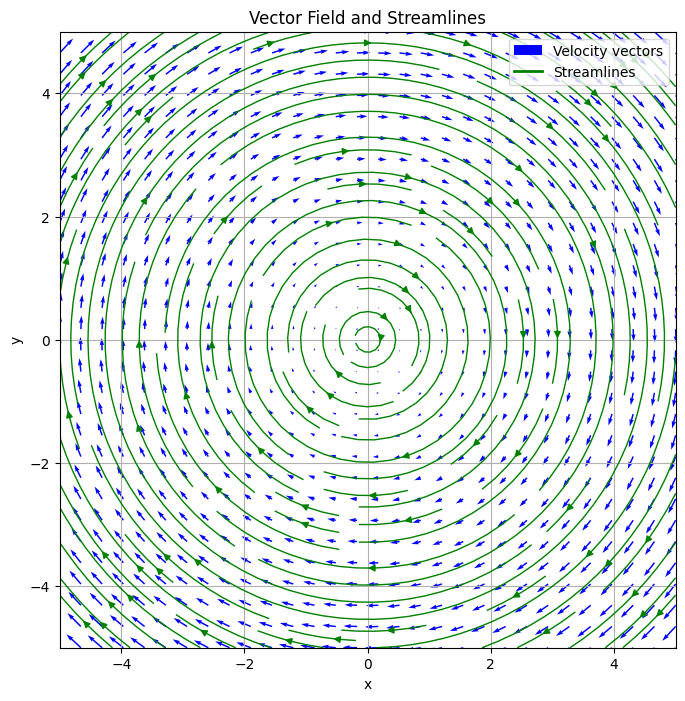

In [2]:
import sympy as sp
import matplotlib.pyplot as plt

# Define symbols
x, y = sp.symbols("x y")

# Define velocity components
u = 2 * y
v = -2 * x

# Integrate u = ∂ψ/∂y with respect to y
psi_partial_y = sp.integrate(u, y)

# Now differentiate this ψ w.r.t x and equate to -v
dpsi_dx = sp.diff(psi_partial_y, x)
# Now, -∂ψ/∂x = v → -dpsi_dx = v
# v = -2x, so:
# -dpsi_dx = -2x
# → dpsi_dx = 2x

# Compute the remaining term f(x)
# Since psi_partial_y has no x term, its derivative is 0
# So, derivative of f(x) must be 2x
f_x = sp.integrate(2 * x, x)

# Final stream function
psi = psi_partial_y + f_x
psi = sp.simplify(psi)

# Convert to numpy functions
u_func = sp.lambdify((x, y), u, "numpy")
v_func = sp.lambdify((x, y), v, "numpy")
psi_func = sp.lambdify((x, y), psi, "numpy")

# Create grid
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute velocity components
U = u_func(X, Y)
V = v_func(X, Y)

# Compute stream function values
PSI = psi_func(X, Y)

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Vector field
qv = ax.quiver(X, Y, U, V, color="blue", label="Velocity vectors")

# Streamplot for smooth streamlines
strm = ax.streamplot(X, Y, U, V, color="green", linewidth=1, density=1.2)
stream_proxy = plt.Line2D([0], [0], color="green", lw=2, label="Streamlines")

# Plot settings
ax.set_title("Vector Field and Streamlines")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect("equal")
ax.grid(True)

# Legend
ax.legend(handles=[qv, stream_proxy], loc="upper right")

plt.show()